<a href="https://colab.research.google.com/github/yashikart/CAT-DOG_CLASSIFIER_USING_CNN/blob/main/CAT_DOG_Classifier_Using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout

In [123]:
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2,
                            rotation_range=10, width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,zoom_range=0.10,horizontal_flip=True)

In [124]:
train_directory = '/content/drive/MyDrive/Cat-Dog/training_set/training_set'
train = datagen.flow_from_directory(
    train_directory,
    batch_size=32,
    target_size=(28,28),
    class_mode='binary'
)

test_directory = '/content/drive/MyDrive/Cat-Dog/test_set/test_set'
test = datagen.flow_from_directory(
    test_directory,
    target_size=(28,28),
    class_mode='binary'
)

Found 8035 images belonging to 2 classes.
Found 2033 images belonging to 2 classes.


In [125]:
modl3 = Sequential()

modl3.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,3)))
modl3.add(MaxPooling2D(pool_size=(2,2)))

modl3.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
modl3.add(MaxPooling2D(pool_size=(2,2)))

modl3.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
modl3.add(MaxPooling2D(pool_size=(2,2)))


modl3.add(Flatten())

modl3.add(Dense(128,activation='relu'))
modl3.add(Dropout(0.1))
modl3.add(Dense(64,activation='relu'))
modl3.add(Dropout(0.1))


modl3.add(Dense(1,activation='sigmoid'))

In [126]:
modl3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 3, 3, 128)       

In [127]:
modl3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [128]:
history3 = modl3.fit(train,epochs=20,validation_data=test)

Epoch 1/20
252/252 [==============================] - 48s 167ms/step - loss: 0.6856 - accuracy: 0.5350 - val_loss: 0.6805 - val_accuracy: 0.5007
Epoch 2/20
252/252 [==============================] - 32s 127ms/step - loss: 0.6374 - accuracy: 0.6427 - val_loss: 0.6305 - val_accuracy: 0.6640
Epoch 3/20
252/252 [==============================] - 37s 148ms/step - loss: 0.5990 - accuracy: 0.6838 - val_loss: 0.5766 - val_accuracy: 0.7083
Epoch 4/20
252/252 [==============================] - 37s 145ms/step - loss: 0.5792 - accuracy: 0.6947 - val_loss: 0.5657 - val_accuracy: 0.7196
Epoch 5/20
252/252 [==============================] - 32s 125ms/step - loss: 0.5566 - accuracy: 0.7172 - val_loss: 0.5510 - val_accuracy: 0.7177
Epoch 6/20
252/252 [==============================] - 32s 129ms/step - loss: 0.5426 - accuracy: 0.7250 - val_loss: 0.5393 - val_accuracy: 0.7309
Epoch 7/20
252/252 [==============================] - 33s 130ms/step - loss: 0.5330 - accuracy: 0.7307 - val_loss: 0.5918 - val_ac

In [129]:
results = modl3.evaluate(test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.45791
Test Accuracy: 78.80%


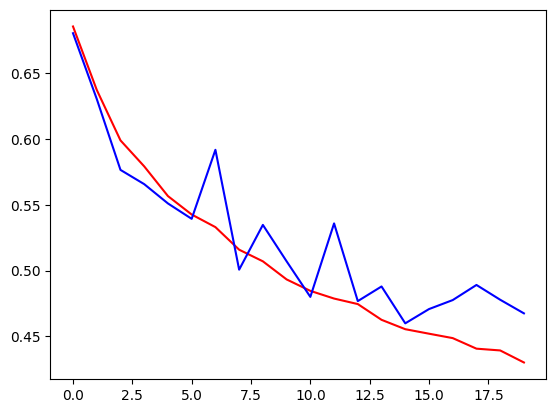

In [130]:
import matplotlib.pyplot as plt

plt.plot(history3.history['loss'],color='red',label='train')
plt.plot(history3.history['val_loss'],color='blue',label='test')

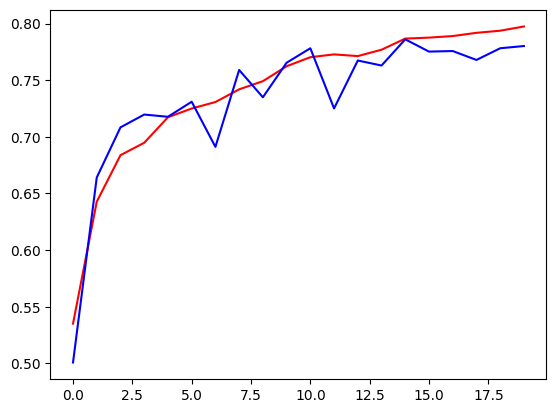

In [131]:
import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'],color='red',label='train')
plt.plot(history3.history['val_accuracy'],color='blue',label='test')

In [167]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

input_image_path = input("Image path : ")
input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (28,28))

cv2_imshow(input_image_resized)

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,28,28,3])

input_prediction = modl3.predict(input_image_reshaped)

print(input_prediction)

if input_prediction < 0.75:
  print("CAT")
else:
  print("DOG")

Image path : /content/dog1.jpg


1/1 [==============================] - 0s 17ms/step
0.95780355
DOG
